In [11]:
from pathlib import Path
import os

import numpy as np
import pandas as pd

pd.set_option("display.max_columns", 100)
dirname = os.path.dirname(os.path.abspath("__file__"))
d = os.path.dirname(os.getcwd())

In [12]:
features_df = pd.read_csv(
    d + "/Datasets/training_set_features_normalized(new num).csv", 
    index_col="respondent_id"
)
labels_df = pd.read_csv(
    d + "/Datasets/training_set_labels.csv", 
    index_col="respondent_id"
)

In [13]:
print("features_df.shape", features_df.shape)
features_df.head()

features_df.shape (26707, 35)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,3,1,2,2,1,2,3,0,0,1,0,0,1,1,2,2,0,0,20,23
1,3,2,0,1,0,1,0,1,1,0,0,0,0,0,1,5,4,4,4,2,4,1,1,0,0,0,0,0,0,0,0,0,0,3,5
2,1,1,0,1,0,0,0,0,0,2,2,1,0,0,2,3,1,1,4,1,2,0,3,0,0,1,0,1,0,3,0,2,0,6,9
3,1,1,0,1,0,1,1,0,0,0,1,1,0,0,2,3,3,5,5,4,1,4,1,0,1,0,0,0,1,9,1,0,0,20,23
4,2,1,0,1,0,1,1,0,1,0,0,0,0,0,2,3,3,2,3,1,4,2,2,0,1,1,1,1,0,3,0,1,0,7,13


In [14]:
features_df.dtypes

h1n1_concern                   int64
h1n1_knowledge                 int64
behavioral_antiviral_meds      int64
behavioral_avoidance           int64
behavioral_face_mask           int64
behavioral_wash_hands          int64
behavioral_large_gatherings    int64
behavioral_outside_home        int64
behavioral_touch_face          int64
doctor_recc_h1n1               int64
doctor_recc_seasonal           int64
chronic_med_condition          int64
child_under_6_months           int64
health_worker                  int64
health_insurance               int64
opinion_h1n1_vacc_effective    int64
opinion_h1n1_risk              int64
opinion_h1n1_sick_from_vacc    int64
opinion_seas_vacc_effective    int64
opinion_seas_risk              int64
opinion_seas_sick_from_vacc    int64
age_group                      int64
education                      int64
race                           int64
sex                            int64
income_poverty                 int64
marital_status                 int64
r

In [15]:
print("labels_df.shape", labels_df.shape)
labels_df.head()

labels_df.shape (26707, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [16]:
np.testing.assert_array_equal(features_df.index.values, labels_df.index.values)

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

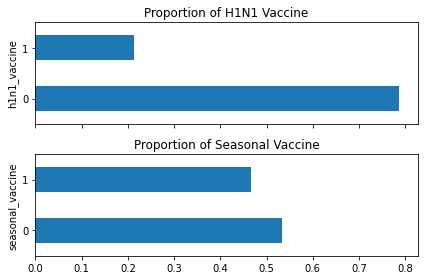

In [18]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = labels_df.shape[0]

(labels_df['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")

(labels_df['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()


In [19]:
pd.crosstab(
    labels_df["h1n1_vaccine"], 
    labels_df["seasonal_vaccine"], 
    margins=True,
    normalize=True
)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


In [20]:
# Phi Coefficient is the same as Pearson for two binary variables
(labels_df["h1n1_vaccine"]
     .corr(labels_df["seasonal_vaccine"], method="pearson")
)

0.37714265306144495

In [21]:
joined_df = features_df.join(labels_df)
print(joined_df.shape)
joined_df.head()

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,3,1,2,2,1,2,3,0,0,1,0,0,1,1,2,2,0,0,20,23,0,0
1,3,2,0,1,0,1,0,1,1,0,0,0,0,0,1,5,4,4,4,2,4,1,1,0,0,0,0,0,0,0,0,0,0,3,5,0,1
2,1,1,0,1,0,0,0,0,0,2,2,1,0,0,2,3,1,1,4,1,2,0,3,0,0,1,0,1,0,3,0,2,0,6,9,0,0
3,1,1,0,1,0,1,1,0,0,0,1,1,0,0,2,3,3,5,5,4,1,4,1,0,1,0,0,0,1,9,1,0,0,20,23,0,1
4,2,1,0,1,0,1,1,0,1,0,0,0,0,0,2,3,3,2,3,1,4,2,2,0,1,1,1,1,0,3,0,1,0,7,13,0,0


In [22]:
counts = (joined_df[['h1n1_concern', 'h1n1_vaccine']]
              .groupby(['h1n1_concern', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine')
         )
counts

h1n1_vaccine,0,1
h1n1_concern,,
0,2849,447
1,6756,1397
2,8102,2473
3,3250,1341
4,76,16


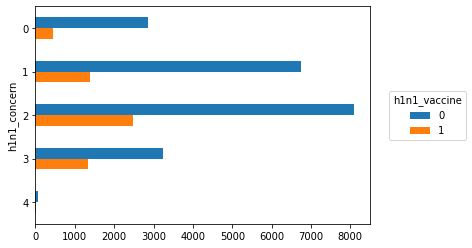

In [23]:
ax = counts.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center right', 
    bbox_to_anchor=(1.3, 0.5), 
    title='h1n1_vaccine'
)

In [24]:
h1n1_concern_counts = counts.sum(axis='columns')
h1n1_concern_counts

h1n1_concern
0     3296
1     8153
2    10575
3     4591
4       92
dtype: int64

In [25]:
props = counts.div(h1n1_concern_counts, axis='index')
props

h1n1_vaccine,0,1
h1n1_concern,,
0,0.864381,0.135619
1,0.828652,0.171348
2,0.766147,0.233853
3,0.707907,0.292093
4,0.826087,0.173913


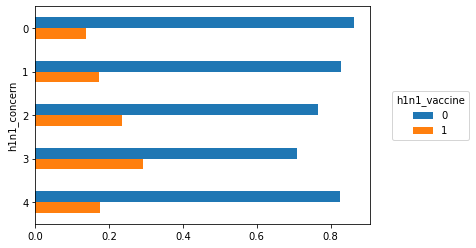

In [26]:
ax = props.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

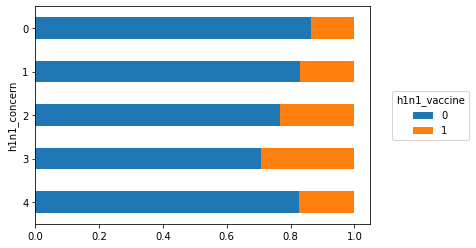

In [27]:
ax = props.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

In [28]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (joined_df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

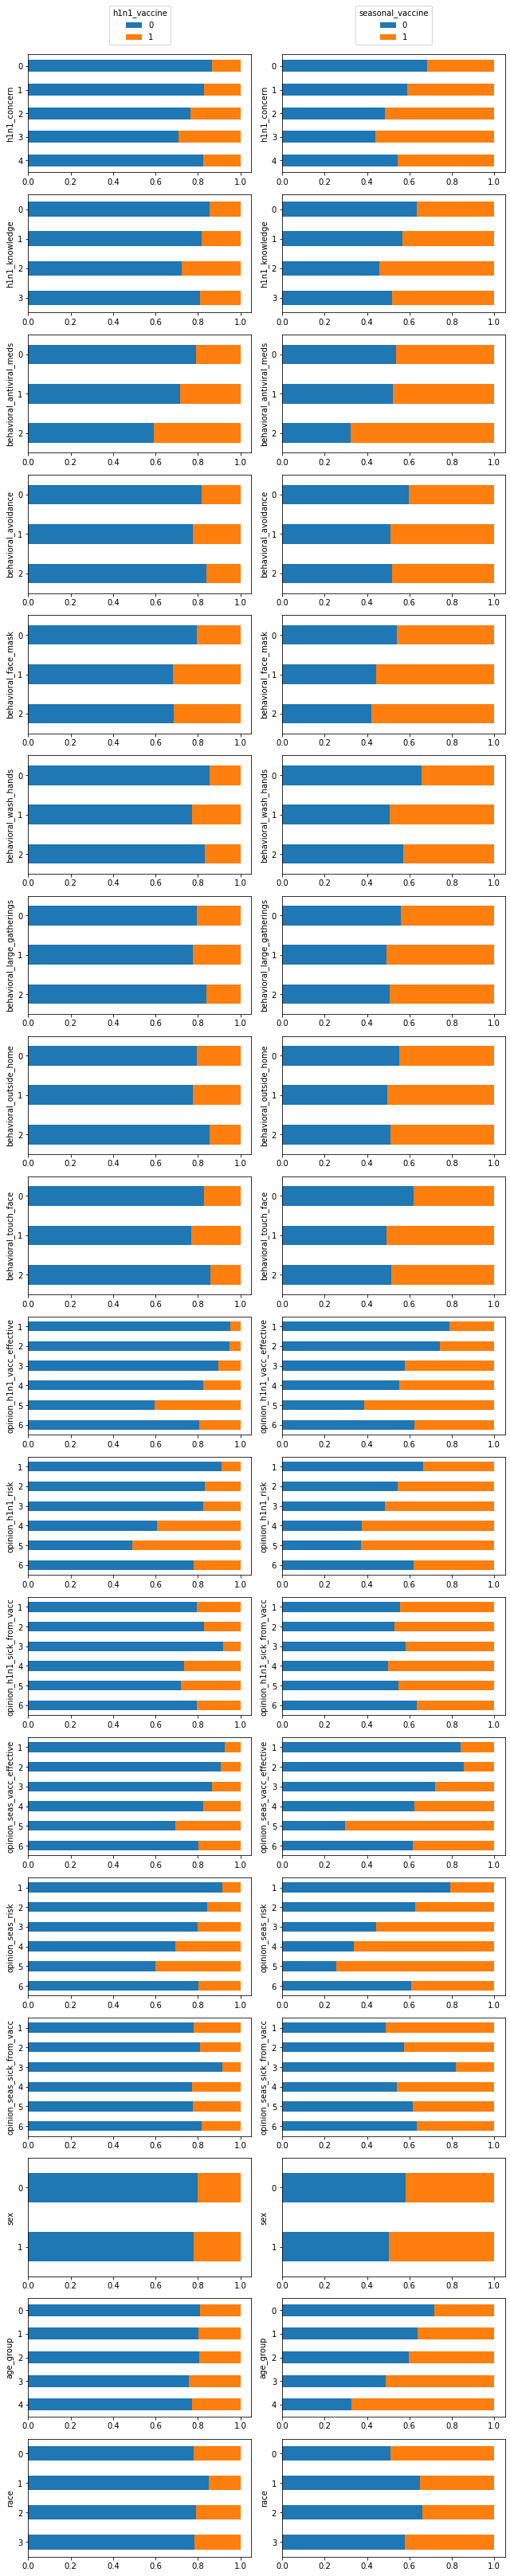

In [29]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'behavioral_antiviral_meds',
    'behavioral_avoidance',
    'behavioral_face_mask',
    'behavioral_wash_hands',
    'behavioral_large_gatherings',
    'behavioral_outside_home',
    'behavioral_touch_face',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(9,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', joined_df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', joined_df, ax=ax[idx, 1]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score

RANDOM_SEED = 6    # Set a random seed for reproducibility!

<ipython-input-31-12f8e6d9a6e0>:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

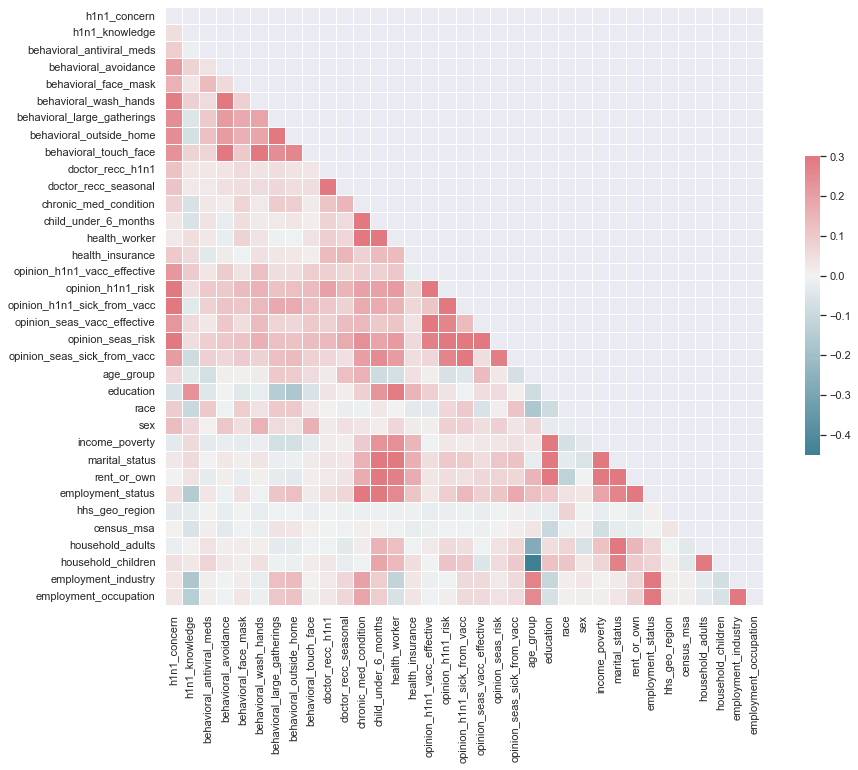

In [31]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="dark")

# Compute the correlation matrix
corr = features_df.corr()
print()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

Feature Selection Part, will do several, including filter and wrapper methods

In [32]:
X = pd.DataFrame.drop(features_df,labels=['respondent_id'],axis=1).values
y = pd.DataFrame.drop(labels_df,labels=['respondent_id'],axis=1).values

KeyError: "['respondent_id'] not found in axis"

<AxesSubplot:>

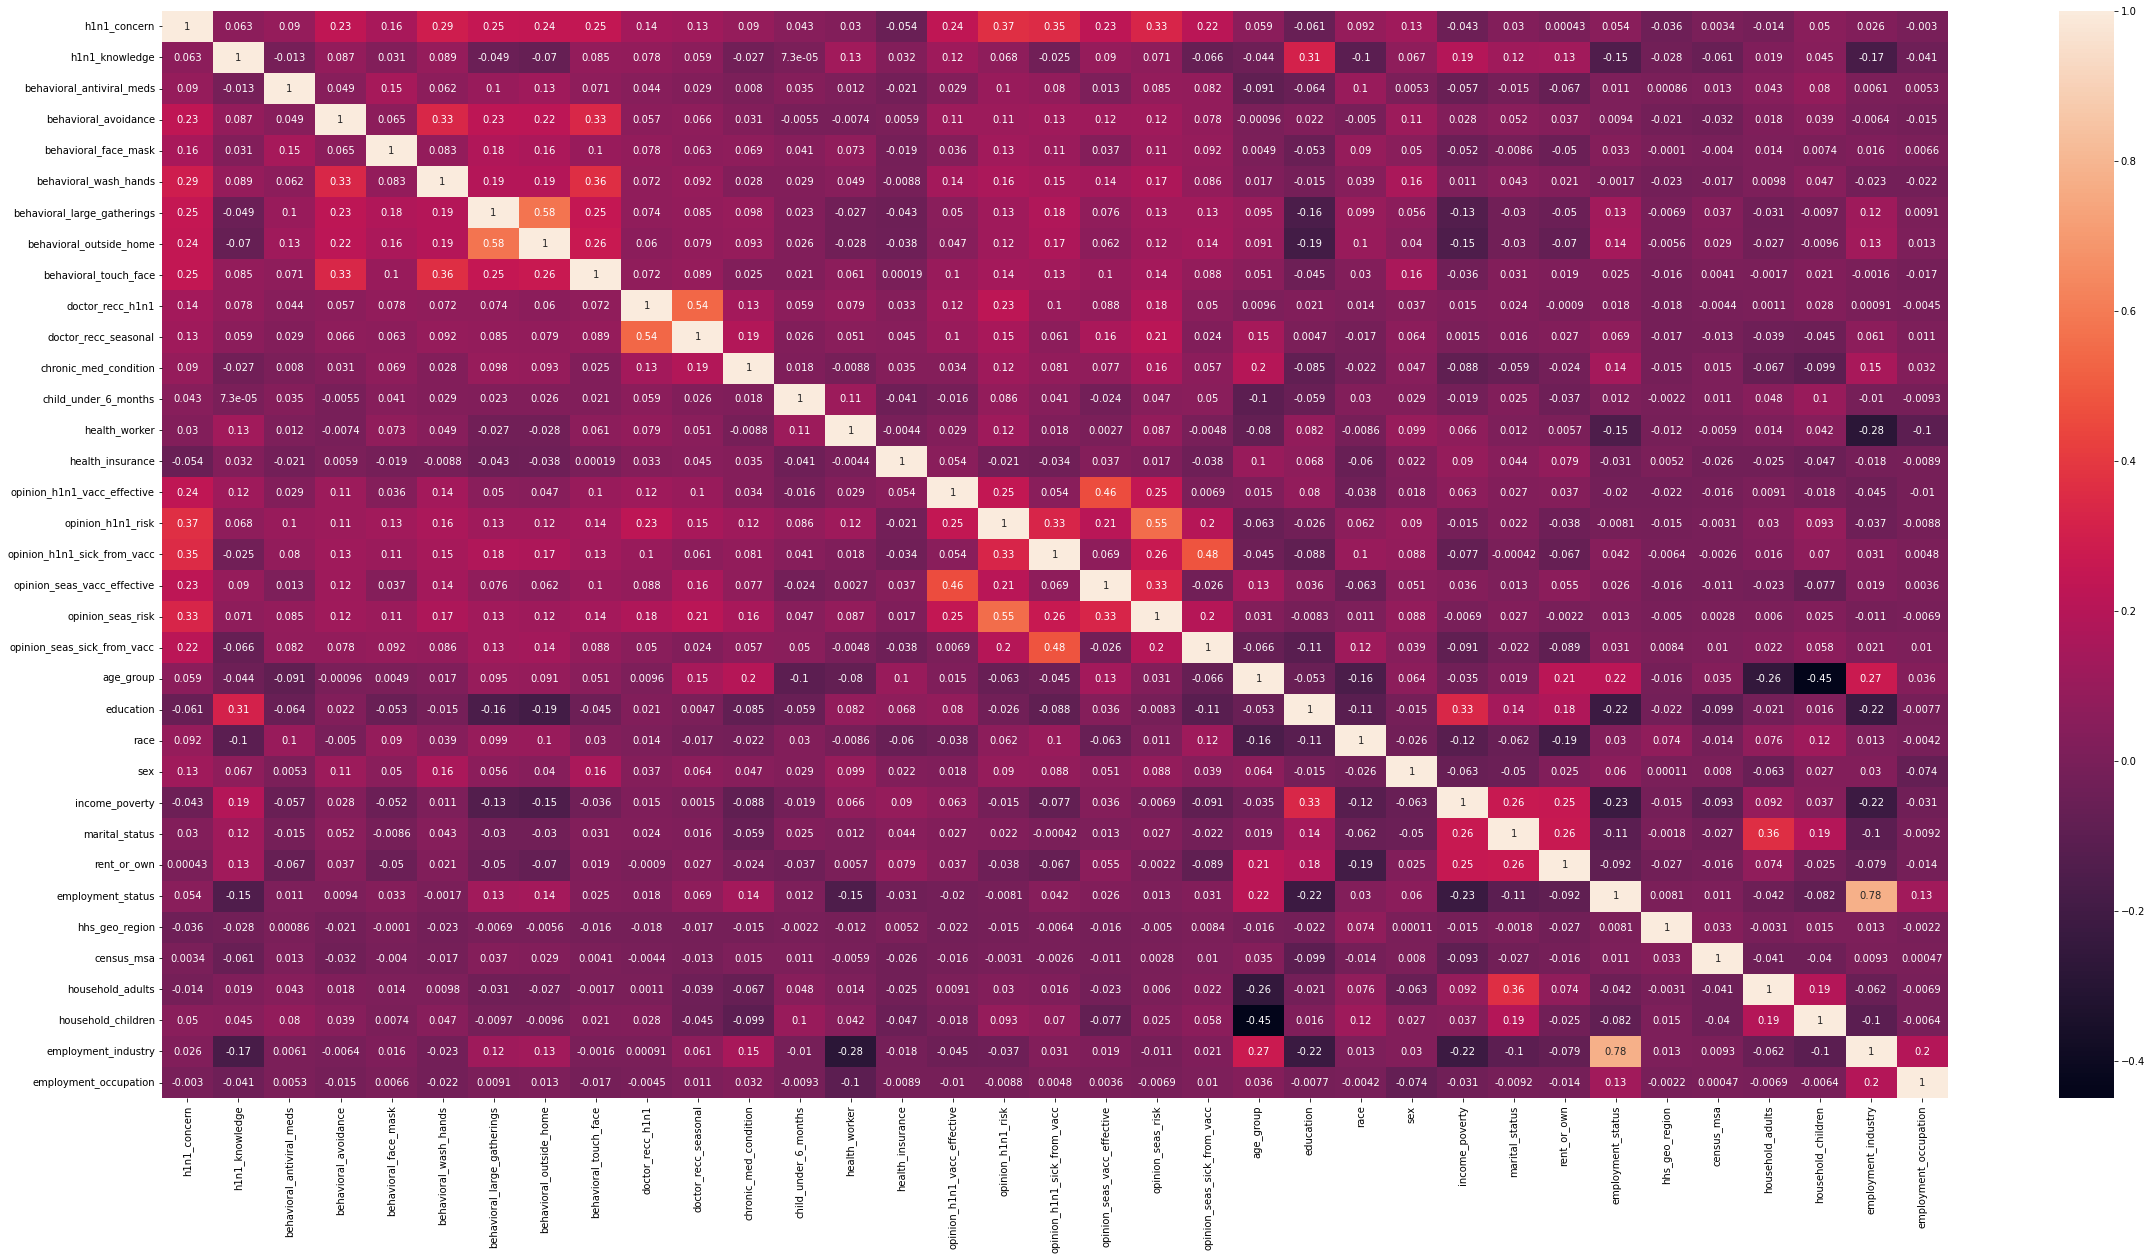

In [ ]:
#Correlation Coefficient
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Correlation matrix
cor = features_df.corr()

# Plotting Heatmap
plt.figure(figsize = (40,20))
sns.heatmap(cor, annot = True)

In [ ]:
#Variance Threshold
from sklearn.feature_selection import VarianceThreshold

#Resetting the value of X to make it non-categorical
#X = features_df[:,0:8]

v_threshold = VarianceThreshold(threshold=0)
v_threshold.fit(features_df)
v_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

<BarContainer object of 35 artists>

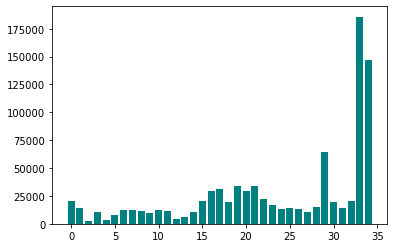

In [ ]:
#Calculate MAD (Mean Absolute Difference)
mean_abs_diff = np.sum(np.abs(features_df -np.mean(features_df, axis=0)), axis=0/features_df.shape[0])

#Plot the barchart
plt.bar(np.arange(features_df.shape[1]),mean_abs_diff, color='teal')

In [ ]:
features_df.dtypes != "object"

h1n1_concern                   True
h1n1_knowledge                 True
behavioral_antiviral_meds      True
behavioral_avoidance           True
behavioral_face_mask           True
behavioral_wash_hands          True
behavioral_large_gatherings    True
behavioral_outside_home        True
behavioral_touch_face          True
doctor_recc_h1n1               True
doctor_recc_seasonal           True
chronic_med_condition          True
child_under_6_months           True
health_worker                  True
health_insurance               True
opinion_h1n1_vacc_effective    True
opinion_h1n1_risk              True
opinion_h1n1_sick_from_vacc    True
opinion_seas_vacc_effective    True
opinion_seas_risk              True
opinion_seas_sick_from_vacc    True
age_group                      True
education                      True
race                           True
sex                            True
income_poverty                 True
marital_status                 True
rent_or_own                 

In [ ]:
numeric_cols = features_df.columns[features_df.dtypes != "object"].values
print(numeric_cols)

['h1n1_concern' 'h1n1_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_h1n1' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_h1n1_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'age_group' 'education'
 'race' 'sex' 'income_poverty' 'marital_status' 'rent_or_own'
 'employment_status' 'hhs_geo_region' 'census_msa' 'household_adults'
 'household_children' 'employment_industry' 'employment_occupation']


In [ ]:
# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols)
    ],
    remainder = "drop"
)

In [ ]:
estimators = MultiOutputClassifier(
    estimator=LogisticRegression(penalty="l2", C=1, max_iter=1000)
)

In [ ]:
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

In [ ]:
full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race',
       'sex', 'income_poverty', 'marital_status', 'rent_or_own',
       'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupat

In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(
    features_df,
    labels_df,
    test_size=0.33,
    shuffle=True,
    stratify=labels_df,
    random_state=RANDOM_SEED
)

In [ ]:
#Recursive Feature Selection
from sklearn.feature_selection import RFE
rfe = RFE(estimators, n_features_to_select=10)
rfe.fit(X_train, y_train)
y_pred = rfe.predict(X_train)

ValueError: when `importance_getter=='auto'`, the underlying estimator MultiOutputClassifier should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [ ]:
%%time

# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
# This competition wants probabilities, not labels
preds = full_pipeline.predict_proba(X_eval)
preds

CPU times: total: 344 ms
Wall time: 105 ms


[array([[0.40586417, 0.59413583],
        [0.95863364, 0.04136636],
        [0.88577258, 0.11422742],
        ...,
        [0.92727338, 0.07272662],
        [0.95942034, 0.04057966],
        [0.93718616, 0.06281384]]),
 array([[0.39186964, 0.60813036],
        [0.63737831, 0.36262169],
        [0.31041638, 0.68958362],
        ...,
        [0.83315975, 0.16684025],
        [0.82621064, 0.17378936],
        [0.15257326, 0.84742674]])]

In [ ]:
print("test_probas[0].shape", preds[0].shape)
print("test_probas[1].shape", preds[1].shape)

test_probas[0].shape (8814, 2)
test_probas[1].shape (8814, 2)


In [ ]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
6728,0.594136,0.608130
16516,0.041366,0.362622
3106,0.114227,0.689584
16981,0.489264,0.746333
19111,0.441887,0.852810


In [ ]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

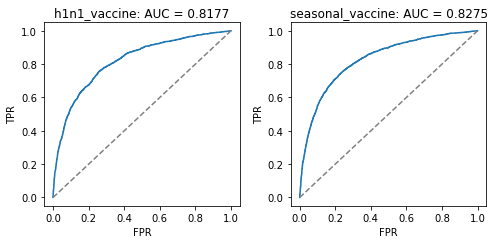

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [ ]:
roc_auc_score(y_eval, y_preds)

0.822582767672605

In [ ]:
%%time 

full_pipeline.fit(features_df, labels_df)

None   # So we don't print out the whole pipeline representation

CPU times: total: 484 ms
Wall time: 148 ms


In [ ]:
test_features_df = pd.read_csv("test_set_features_normalized.csv", 
                               index_col="respondent_id")

In [ ]:
test_probas = full_pipeline.predict_proba(test_features_df)
test_probas

[array([[0.81524534, 0.18475466],
        [0.864636  , 0.135364  ],
        [0.63670079, 0.36329921],
        ...,
        [0.85760354, 0.14239646],
        [0.96932711, 0.03067289],
        [0.4191067 , 0.5808933 ]]),
 array([[0.6067279 , 0.3932721 ],
        [0.90957561, 0.09042439],
        [0.28205229, 0.71794771],
        ...,
        [0.766971  , 0.233029  ],
        [0.69279332, 0.30720668],
        [0.49453607, 0.50546393]])]

In [ ]:
submission_df = pd.read_csv("submission_format.csv", 
                            index_col="respondent_id")

In [ ]:
submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.5,0.7
26708,0.5,0.7
26709,0.5,0.7
26710,0.5,0.7
26711,0.5,0.7


In [ ]:
# Make sure we have the rows in the same order
np.testing.assert_array_equal(test_features_df.index.values, 
                              submission_df.index.values)

# Save predictions to submission data frame
submission_df["h1n1_vaccine"] = test_probas[0][:, 1]
submission_df["seasonal_vaccine"] = test_probas[1][:, 1]

submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.184755,0.393272
26708,0.135364,0.090424
26709,0.363299,0.717948
26710,0.281070,0.722492
26711,0.346262,0.549640


In [ ]:
submission_df.to_csv('my_submission.csv', index=True)

In [ ]:
!head my_submission.csv

'head' is not recognized as an internal or external command,
operable program or batch file.
